# Análisis exploratorio de los datos: Noticias falsas y Noticias reales

In [2]:
# Importar las librerías con el código desarrollado
import sys
import pathlib

In [3]:
# Obtener la ruta de las librerías personalizadas requeridas para cargar los datos
def get_directory():
    pathtest= pathlib.Path() 
    current_path = str(pathtest.parent.absolute())
    name_directory = "ProyectoUNAL"
    index_path = current_path.find(name_directory)
    path_data = current_path[:index_path+len(name_directory)]
    path_data += '\\scripts\\data_acquisition'
    return path_data

In [5]:
# Adcionar la ruta de las librerías  personalizadas requeridas para cargar los datos
path_source = get_directory()
sys.path.append(path_source)

In [6]:
# Librerías a usar en el proyecto
from download_data import get_data
import pandas as pd
import plotly.express as px
from statistics import mean

Cargue de la información: archivo de noticias falsa y archivo e noticias reales.

In [7]:
# Obtención de los archivos
news_true, news_false = get_data()

# **1. Análisis del archivo noticias reales**
De acuerdo con el análisis exploratorio de los datos se encuentra:
1. Total de noticias: 21417
2. Noticias en el año 2016: 4716
3. Noticias en el año 2017: 16701
4. Las noticias se encuentran asociadas a dos temas: 'politicsNews' y 'worldnews'. 
5. Noticias que tratan de politicsNews : 11272
6. Noticias que tratan de worldnews: 10145
7. Se encuentra un registro sin contenido en el texto de la noticia el cual será eliminado en el preprocesamiento del archivo.

In [8]:
# Conteo del número de registros
news_true.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [9]:
# Información del dataframe
news_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
# Convertir el formato de la columna date a datetime
news_true['date'] = pd.to_datetime(news_true['date'], infer_datetime_format=True)

In [11]:
# Extraer el año de la fecha
news_true['anno'] = news_true['date'].dt.year

In [12]:
# Validación de la conversión del formato y creación de los nuevos elementos 
news_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
 4   anno     21417 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 836.7+ KB


In [13]:
# Número de noticias por año
dfg=news_true.groupby('anno').count().reset_index()
fig = px.bar(dfg, x='anno', y = 'title', title = 'Número de noticias reales por año', color = 'title', barmode = 'stack', text_auto='.2s',
              labels={'anno':'Año de la noticia','title':'Número de noticias'})
fig.show()

In [14]:
# Análisis del subject de las noticias
print(news_true['subject'].unique())

['politicsNews' 'worldnews']


In [15]:
# Número de noticias por tópico
dfg=news_true.groupby('subject').count().reset_index()
fig = px.bar(dfg, x='subject', y = 'title', title = 'Número de noticias reales por tópico', color = 'title', barmode = 'stack',
              labels={'subject':'Tópico de la noticia','title':'Número de noticias'})
fig.show()

In [16]:
# Ejemplo aleatorio de 5 noticias reales y del contenido que ofrece el dataset
news_true.sample(5)

,title,text,subject,date,anno
14956,Kosovo at risk of attacks by returning Islamis...,PRISTINA (Reuters) - Kosovo s government consi...,worldnews,2017-11-13,2017
17068,UK's May to meet Bill Clinton to discuss North...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,2017-10-18,2017
1485,"Trump congratulates Merkel on election win, di...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,2017-09-28,2017
4944,"FBI, NSA chiefs to testify on Trump wiretap cl...",WASHINGTON (Reuters) - Leaders of the House of...,politicsNews,2017-03-15,2017
9382,Ohio legislature votes to allow limited medica...,CLEVELAND (Reuters) - Lawmakers in Ohio on Wed...,politicsNews,2016-05-26,2016


In [17]:
# Cálculo de la extensión del título (title) y contenido (text) de las noticias reales
news_true['len_title'] = (news_true['title'].str.strip()).str.len()
news_true['len_text'] = (news_true['text'].str.strip()).str.len()

In [19]:
# Análisis de la extensión del título (title) y contenido (text) de las noticias reales
min_title = min(news_true['len_title'])
max_title = max(news_true['len_title'])
ave_title = mean(news_true['len_title'])
min_text = min(news_true['len_text'])
max_text = max(news_true['len_text'])
ave_text = mean(news_true['len_text'])

In [47]:
print(f"Tamaño Máximo del título: {max_title} caracteres. Tamaño Mínimo del título: {min_title} caracteres, Tamaño promedio del título: { round(ave_title)} caracteres")
print(f"Tamaño Máximo del contenido: {max_text} caracteres. Tamaño Mínimo del contenido: {min_text} caracteres, Tamaño promedio del contenido: { round(ave_text)} caracteres")

Tamaño Máximo del título: 133 caracteres. Tamaño Mínimo del título: 26 caracteres, Tamaño promedio del título: 65 caracteres
Tamaño Máximo del contenido: 29780 caracteres. Tamaño Mínimo del contenido: 0 caracteres, Tamaño promedio del contenido: 2382 caracteres


In [20]:
# Se muestran los registros con longitud 0 en el campo text
news_true_short = news_true[news_true['len_text'] == 0]

In [21]:
# solo un registro con longitud 0
news_true_short 

,title,text,subject,date,anno,len_title,len_text
8970,Graphic: Supreme Court roundup,,politicsNews,2016-06-16,2016,30,0


In [22]:
# Se crea un nuevo dataframe eliminando el registro sin información en el campo text
news_true_mod = news_true[news_true['len_text'] > 0]

In [23]:
# Se calcula de nuevo los valores min, max y promedio en longitud del contenido
min_text = min(news_true_mod['len_text'])
max_text = max(news_true_mod['len_text'])
ave_text = mean(news_true_mod['len_text'])

In [24]:
print(f"Tamaño Máximo del contenido: {max_text} caracteres. Tamaño mínimo del contenido: {min_text} caracteres, Tamaño promedio del contenido: { round(ave_text)} caracteres")

Tamaño Máximo del contenido: 29780 caracteres. Tamaño mínimo del contenido: 151 caracteres, Tamaño promedio del contenido: 2382 caracteres


# **2. Análisis del archivo noticias falsas**
De acuerdo con el análisis exploratorio de los datos se encuentra:
1. Total de noticias: 23481.
2. El campo 'date' presenta diferentes formatos e incluso datos que no corresponden a la fecha, sin embargo dado el problema que se plantea y como resultado de análisis exploratorio no se considera información relevante para el desarrollo del objetivo del proyecto.
4. Las noticias se encuentran asociadas a dos temas: 'News', 'politics', 'Government News', 'left-news', 'US_News' y 'Middle-east.
5. Noticias que tratan de politics : 6841.
6. Noticias que tratan de News: 9050.
7. Noticias que tratan de Government News: 1570.
8. Noticias que tratan de left-News: 4459.
9. Noticias que tratan de US_News: 783.
10. Noticias que tratan de Middle-east: 778.
11. Se encuentran 630 registros sin contenido en el texto de la noticia, los cuales serán eliminados en el preprocesamiento del archivo.
12. Se encuentran registros 211 registros cuyo tamaño del contenido es muy corto inferior o igual a 50 caracteres. Estos registros serán eliminados de la fuente de datos a procesar. Y se probarán los resultados para evaluar si puede requerirse hacer una nueva inspección y tomar registros con un tamaño del contenido superior al límite usado inicialmente de 50 caracteres.

In [25]:
# Conteo del número de registros
news_false.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [26]:
# Información del dataframe
news_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [27]:
# Análisis del subject de las noticias
print(news_false['subject'].unique())

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [28]:
# Número de noticias por tópico
dfg=news_false.groupby('subject').count().reset_index()
fig = px.bar(dfg, x='subject', y = 'title', title = 'Número de noticias falsas por tópico', color = 'title', barmode = 'stack',text_auto='.2s',
              labels={'subject':'Tópico de la noticia','title':'Número de noticias'})
fig.show()

In [29]:
# Ejemplo aleatorio de 5 noticias falsas y del contenido que ofrece el dataset
news_false.sample(5)

,title,text,subject,date
2723,Robert Reich Makes STUNNING Anti-Trump Statem...,Donald Trump is successfully ruining all of ou...,News,"February 2, 2017"
2825,"After Months Of Concern Trolling, Trump Prove...",Amid one of the most racist presidential campa...,News,"January 26, 2017"
9986,Mainstream Media Spreads Huge Lie GOP Official...,The usual mainstream media suspects are at it ...,politics,"Sep 4, 2017"
13577,BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hom...,Just another big city destroyed by Democrats A...,politics,"Jul 5, 2016"
18580,CONSEQUENCES OF LIBERAL TOLERANCE: He Had An I...,Terrified concert goers fled an Ariana Grande ...,left-news,"May 25, 2017"


In [30]:
# Análisis exploratorio del campo date, al encontrarse que no todas las filas tienen una fecha en esa columna
serie = news_false.iloc[9350:9400,3]
print(serie)

9350                                         Nov 26, 2017
9351                                         Nov 26, 2017
9352                                         Nov 26, 2017
9353                                         Nov 25, 2017
9354                                         Nov 25, 2017
9355                                         Nov 25, 2017
9356                                         Nov 25, 2017
9357                                         Nov 25, 2017
9358    https://100percentfedup.com/served-roy-moore-v...
9359                                         Nov 25, 2017
9360                                         Nov 24, 2017
9361                                         Nov 24, 2017
9362                                         Nov 24, 2017
9363                                         Nov 23, 2017
9364                                         Nov 23, 2017
9365                                         Nov 22, 2017
9366                                         Nov 22, 2017
9367          

In [31]:
# Ejemplo de uno de los registros y lo que aparece registrado en ese campo
serie9358 = news_false.iloc[9358,:]
print(serie9358[3])

https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/


In [32]:
# Convertir el formato de la columna date a datetime
news_false['date_new'] = pd.to_datetime(news_false['date'], infer_datetime_format=True, errors='coerce')

In [33]:
# Exploración del campo creado para la fecha
news_false['date_new'].unique()

array(['2017-12-31T00:00:00.000000000', '2017-12-30T00:00:00.000000000',
       '2017-12-29T00:00:00.000000000', '2017-12-25T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
       '2017-12-21T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
       '2017-12-19T00:00:00.000000000', '2017-12-17T00:00:00.000000000',
       '2017-12-16T00:00:00.000000000', '2017-12-13T00:00:00.000000000',
       '2017-12-12T00:00:00.000000000', '2017-12-11T00:00:00.000000000',
       '2017-12-10T00:00:00.000000000', '2017-12-09T00:00:00.000000000',
       '2017-12-07T00:00:00.000000000', '2017-12-06T00:00:00.000000000',
       '2017-12-05T00:00:00.000000000', '2017-12-04T00:00:00.000000000',
       '2017-12-03T00:00:00.000000000', '2017-12-02T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-11-29T00:00:00.000000000', '2017-11-28T00:00:00.000000000',
       '2017-11-27T00:00:00.000000000', '2017-11-26

In [34]:
# Cálculo de la extensión del título (title) y contenido (text) de las noticias reales
news_false['len_title'] = (news_false['title'].str.strip()).str.len()
news_false['len_text'] = (news_false['text'].str.strip()).str.len()

In [35]:
# Análisis de la extensión del título (title) y contenido (text) de las noticias reales
min_title_false = min(news_false['len_title'])
max_title_false = max(news_false['len_title'])
ave_title_false = mean(news_false['len_title'])
min_text_false = min(news_false['len_text'])
max_text_false = max(news_false['len_text'])
ave_text_false = mean(news_false['len_text'])

In [37]:
print(f"Tamaño Máximo del título: {max_title_false} caracteres. Tamaño Mínimo del título: {min_title_false} caracteres, Tamaño promedio del título: { round(ave_title_false)} caracteres")
print(f"Tamaño Máximo del contenido: {max_text_false} caracteres. Tamaño Mínimo del contenido: {min_text_false} caracteres, Tamaño promedio del contenido: { round(ave_text_false)} caracteres")

Tamaño Máximo del título: 279 caracteres. Tamaño Mínimo del título: 8 caracteres, Tamaño promedio del título: 94 caracteres
Tamaño Máximo del contenido: 51793 caracteres. Tamaño Mínimo del contenido: 0 caracteres, Tamaño promedio del contenido: 2547 caracteres


In [38]:
# Registros sin información en el campo texto
reg_sininfo = news_false[news_false['len_text'] == 0 ]
reg_sininfo.count()

title        630
text         630
subject      630
date         630
date_new      39
len_title    630
len_text     630
dtype: int64

In [55]:
# Se crea un nuevo dataframe eliminando los registros sin información en el campo text
news_false_mod = news_false[news_false['len_text'] > 0]

In [56]:
# Número de registros en el dataframe de noticias falsa modificado
news_false_mod.count()

title        22851
text         22851
subject      22851
date         22851
date_new     11829
len_title    22851
len_text     22851
dtype: int64

In [57]:
# Se calcula de nuevo los valores min, max y promedio en longitud 
min_text_false = min(news_false_mod['len_text'])
max_text_false = max(news_false_mod['len_text'])
ave_text_false = mean(news_false_mod['len_text'])

In [58]:
print(f"Tamaño Máximo del contenido: {max_text_false} caracteres. Tamaño mínimo del contenido: {min_text_false} caracteres, Tamaño promedio del contenido: { round(ave_text_false)} caracteres")

Tamaño Máximo del contenido: 51793 caracteres. Tamaño mínimo del contenido: 5 caracteres, Tamaño promedio del contenido: 2617 caracteres


In [59]:
# Registros con muy pocos caracteres en el campo texto, analizando el nuevo dataframe modificado
size_limit = 50
reg_lowinfo = news_false_mod[news_false_mod['len_text'] <= size_limit ]
reg_lowinfo.count()

title        211
text         211
subject      211
date         211
date_new       9
len_title    211
len_text     211
dtype: int64

In [61]:
# Inspección de los registros cuyo tamaño del contenido es menor o igual a 50 caracteres
reg_lowinfo['text']

11117                                               Enjoy:
11251          https://www.youtube.com/watch?v=cJZFepSvxzM
11286          https://www.youtube.com/watch?v=-7Tn4gi_Os8
11315          https://www.youtube.com/watch?v=SH0pRtK9sAE
11316          https://www.youtube.com/watch?v=DRLVvYzG46w
                               ...                        
21209                     When karma bites ya  in the a*s 
21503                    My brothers DIED for that flag!  
21659    Here s a mom who knows how to raise her children 
21882                         You won t want to miss this 
21909    PRETTY FUNNY STUFF-MAKE SURE TO WATCH TO THE END.
Name: text, Length: 211, dtype: object

In [64]:
# Se crea un nuevo dataframe eliminando los registros cuto tamaño del campo text es inferior o igual al límite establecido
news_false_mod2 = news_false_mod[news_false_mod['len_text'] > size_limit]

In [101]:
# Número de reistros en el dataframe de noticias falsas modificado
news_false_mod2.count()

title        22640
text         22640
subject      22640
date         22640
date_new     11820
len_title    22640
len_text     22640
type         22640
dtype: int64

In [66]:
# Se calcula de nuevo los valores min, max y promedio en longitud 
min_text_false = min(news_false_mod2['len_text'])
max_text_false = max(news_false_mod2['len_text'])
ave_text_false = mean(news_false_mod2['len_text'])
print(f"Tamaño Máximo del contenido: {max_text_false} caracteres. Tamaño mínimo del contenido: {min_text_false} caracteres, Tamaño promedio del contenido: { round(ave_text_false)} caracteres")

Tamaño Máximo del contenido: 51793 caracteres. Tamaño mínimo del contenido: 51 caracteres, Tamaño promedio del contenido: 2641 caracteres


# **3. Revisión total de las noticias**

In [95]:
# Creación de un único dataframe con las noticias reales y falsas
df_true = news_true
df_true['type'] = 0
df_false = news_false
df_false['type'] = 1

In [96]:
# Creación de un único dataframe con las noticias reales y falsas
df_aux = [df_true, df_false]
df_total = pd.concat(df_aux)

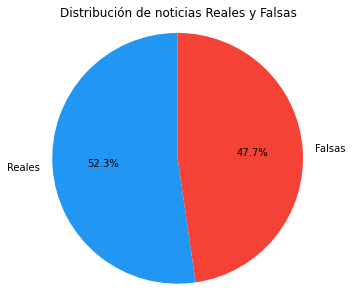

In [100]:
# Distribución del número de nocicias reales y falsas
# Archivos originales
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
labels = 'Reales', 'Falsas'
counts = df_total['type'].value_counts().values
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2196f3', '#f44336' ])
plt.axis('equal')
plt.title("Distribución de noticias Reales y Falsas")
plt.show()